In [ ]:
# importing library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
df = pd.read_csv('customer_churn.csv')

In [ ]:
# first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#A) Data Manipulation:
* a. Find the total number of male customers
* b. Find the total number of customers whose Internet Service is ‘DSL’
* c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
* d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [ ]:
# A
Total_Male_Customer = len(df[df['gender']== 'Male'])
print(f'Total number of male customers: {Total_Male_Customer}')

Total number of male customers: 3555


In [ ]:
# B
Total_Dsl_Customer = len(df[df['InternetService']== 'DSL'])
print(f'Total number of customers whose Internet Service is DSL: {Total_Dsl_Customer}')

Total number of customers whose Internet Service is DSL: 2421


In [ ]:
# C
new_customer = df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [ ]:
# D
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
new_customer = df[(df['tenure'] > 10) & (df['TotalCharges'] < 500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
42,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No
157,2749-CTKAJ,Male,0,Yes,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.15,419.90,No
164,2907-ILJBN,Female,0,Yes,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No


# B) Data Visualization:
* a. Build a pie-chart to show the distribution of customers would be churning out
* b. Build a bar-plot to show the distribution of ‘Internet Service’

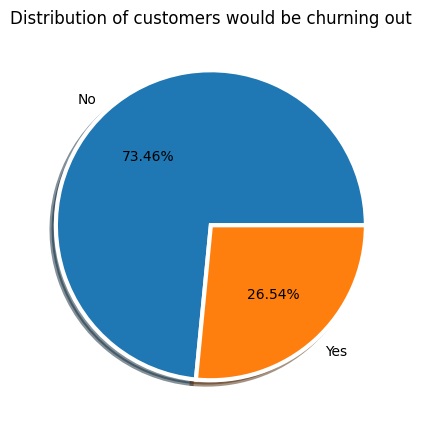

In [ ]:
# A
plt.figure(figsize=(5,6))
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.2f%%',shadow=True,wedgeprops={'edgecolor':'white','linewidth':3})
plt.title('Distribution of customers would be churning out')
plt.show()

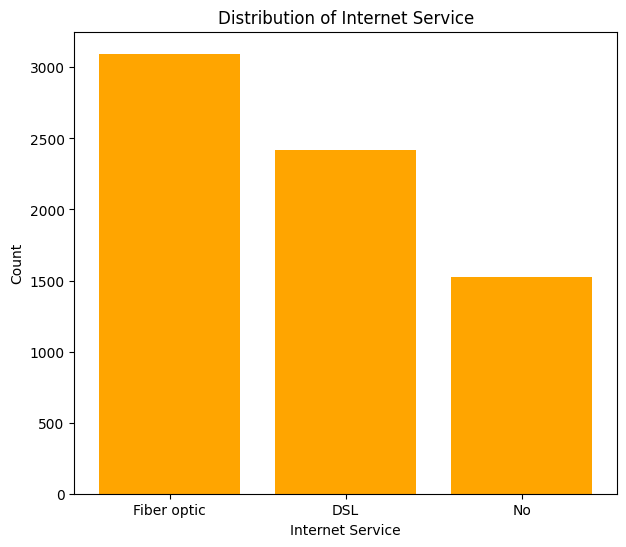

In [ ]:
# B
plt.figure(figsize=(7,6))
plt.bar(df['InternetService'].value_counts().index,height=df['InternetService'].value_counts(),color='orange')
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

In [ ]:
# One Hot Encoding
cat_col = [cat for cat in df.columns if df[cat].dtype == 'object']
ohe = OneHotEncoder(sparse_output=False,drop='first')
for col in cat_col:
    df[col] = ohe.fit_transform(df[[col]])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.85,29.85,0.0
1,0.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.95,1889.50,0.0
2,0.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.85,108.15,1.0
3,0.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.70,151.65,1.0


## C) Model Building:

a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
* i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.  
* ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
* iii. Use ‘Adam’ as the optimization algorithm
* iv. Fit the model on the train set, with number of epochs to be 150
* v. Predict the values on the test set and build a confusion matrix
* vi. Plot the ‘Accuracy vs Epochs’ graph






In [ ]:
# creating the feature & target
X = df[['tenure']]
y = df[['Churn']]

# spliting the data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Building a model
model = models.Sequential()
model.add(Dense(12,activation='relu',input_shape=(1,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7470 - loss: 1.1133 - val_accuracy: 0.7544 - val_loss: 0.4974
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7553 - loss: 0.5164 - val_accuracy: 0.7573 - val_loss: 0.4993
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7531 - loss: 0.5071 - val_accuracy: 0.7573 - val_loss: 0.5010
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7494 - loss: 0.5214 - val_accuracy: 0.7573 - val_loss: 0.5020
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7314 - loss: 0.5253 - val_accuracy: 0.7353 - val_loss: 0.4987
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7406 - loss: 0.5161 - val_accuracy: 0.7353 - val_loss: 0.4974
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7419 - loss: 0.5146 - val_accuracy: 0.7353 - val_loss: 0.5018
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7382 - loss: 0.5238 - val_accu

In [ ]:
# mean accuracy
np.mean(model.history.history['val_accuracy'])

0.7546581614017487

In [ ]:
# Use model.predict and np.argmax instead
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with highest probability
print(y_pred)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[1036    0]
 [ 373    0]]


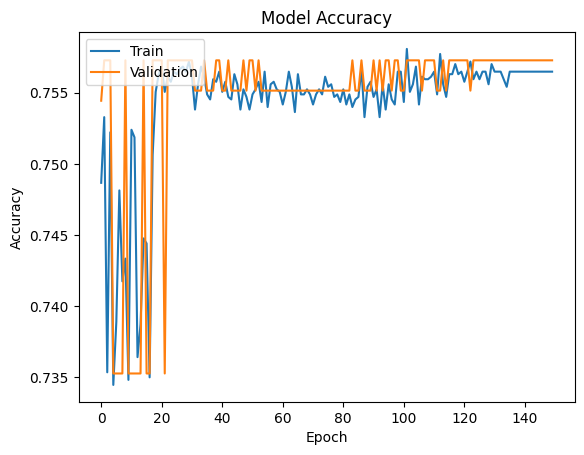

In [ ]:
# Accuracy vs Epochs’ graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

#b. Build the 2nd model using same target and feature variables:
* i. Add a drop-out layer after the input layer with drop-out value of 0.3
* ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
* iii. Predict the values on the test set and build a confusion matrix
* iv. Plot the ‘Accuracy vs Epochs’ graph

In [ ]:
# Building a model
model = models.Sequential()
model.add(Dense(12,activation='relu',input_shape=(1,)))
model.add(layers.Dropout(0.3))
model.add(Dense(8,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6405 - loss: 1.1609 - val_accuracy: 0.7566 - val_loss: 0.5605
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - loss: 0.7423 - val_accuracy: 0.7353 - val_loss: 0.4978
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6975 - loss: 0.5992 - val_accuracy: 0.7353 - val_loss: 0.4999
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7042 - loss: 0.5829 - val_accuracy: 0.7353 - val_loss: 0.5040
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7200 - loss: 0.5566 - val_accuracy: 0.7353 - val_loss: 0.5053
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7257 - loss: 0.5454 - val_accuracy: 0.7353 - val_loss: 0.5127
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7320 - loss: 0.5375 - val_accuracy: 0.7353 - val_loss: 0.5152
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7393 - loss: 0.5349 - val_accu

In [ ]:
# mean accuracy
np.mean(history.history['val_accuracy'])

0.7354151864846548

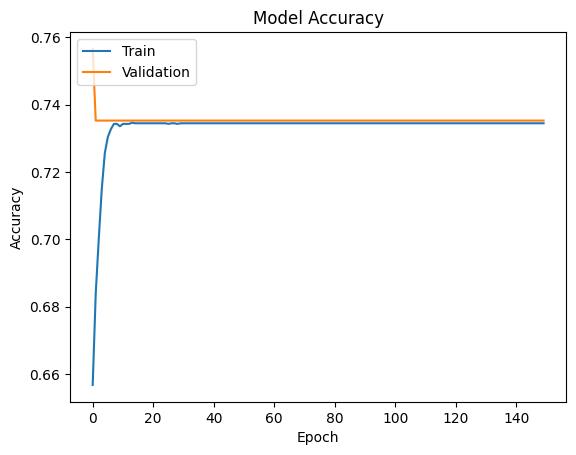

In [ ]:
# Accuracy vs Epochs’ graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

#Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:  
* i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
* ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
* iii.Use ‘Adam’ as the optimization algorithm
* iv. Fit the model on the train set, with number of epochs to be 150
* v. Predict the values on the test set and build a confusion matrix
* vi. Plot the ‘Accuracy vs Epochs’ graph


In [ ]:
X = df[['tenure','MonthlyCharges','TotalCharges']]
y = df[['Churn']]

In [ ]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Building a model
model = models.Sequential()
model.add(Dense(12,activation='relu',input_shape=(3,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 12)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5930 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7207 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7340 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7332 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7350 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7222 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7380 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 9/150
177/

In [ ]:
# mean accuracy
np.mean(model.history.history['val_accuracy'])

0.7352732419967651

In [ ]:
# Use model.predict and np.argmax instead
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with highest probability
print(y_pred)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[0 0 0 ... 0 0 0]


In [ ]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[1036    0]
 [ 373    0]]


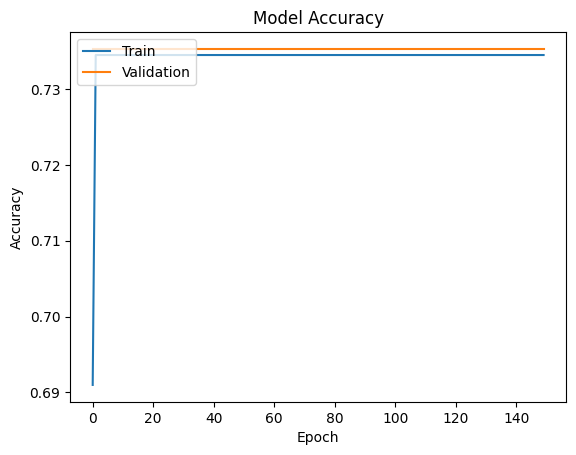

In [ ]:
# Accuracy vs Epochs’ graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Conclusion:

* The first model gave us a mean validation accuracy of 75.46%, the second model had accuracy
of 73.54 and the third model had a mean validation accuracy of 73.52%.